In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [5]:
!kaggle competitions download -c digit-recognizer




  0%|          | 0.00/15.3M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.3M [00:00<00:02, 5.33MB/s]
 13%|#3        | 2.00M/15.3M [00:00<00:02, 5.77MB/s]
 20%|#9        | 3.00M/15.3M [00:00<00:02, 6.31MB/s]
 26%|##6       | 4.00M/15.3M [00:00<00:01, 6.49MB/s]
 33%|###2      | 5.00M/15.3M [00:00<00:01, 6.86MB/s]
 39%|###9      | 6.00M/15.3M [00:00<00:01, 7.16MB/s]
 46%|####5     | 7.00M/15.3M [00:01<00:01, 6.92MB/s]
 52%|#####2    | 8.00M/15.3M [00:01<00:01, 6.50MB/s]
 59%|#####8    | 9.00M/15.3M [00:01<00:01, 6.43MB/s]
 65%|######5   | 10.0M/15.3M [00:01<00:00, 6.53MB/s]
 72%|#######1  | 11.0M/15.3M [00:01<00:00, 6.15MB/s]
 78%|#######8  | 12.0M/15.3M [00:01<00:00, 6.52MB/s]
 85%|########4 | 13.0M/15.3M [00:02<00:00, 6.90MB/s]
 91%|#########1| 14.0M/15.3M [00:02<00:00, 7.12MB/s]
 98%|#########7| 15.0M/15.3M [00:02<00:00, 6.91MB/s]
100%|##########| 15.3M/15.3M [00:02<00:00, 6.91MB/s]


The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255

In [8]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

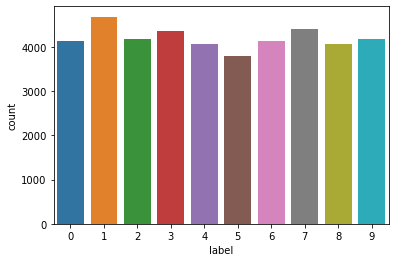

In [9]:
sns.countplot(x='label', data=train);

In [10]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [13]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [14]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

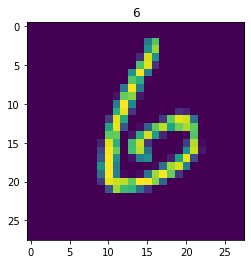

In [17]:
plt.imshow(X_train[2][:,:,0])
plt.title(y_train[2].argmax());

In [19]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128 

In SGD 30 epochs is a reasonable choice to use although it takes a long time to compute.
Adam optimizer converges quicker. Use one of the following optimizers.

In [20]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

Epoch 1/10
378/378 [==============================] - 78s 206ms/step - loss: 0.5895 - accuracy: 0.8082 - val_loss: 1.2649 - val_accuracy: 0.5388
Epoch 2/10
378/378 [==============================] - 76s 201ms/step - loss: 0.1416 - accuracy: 0.9596 - val_loss: 0.0683 - val_accuracy: 0.9776
Epoch 3/10
378/378 [==============================] - 76s 201ms/step - loss: 0.0962 - accuracy: 0.9728 - val_loss: 0.0796 - val_accuracy: 0.9767
Epoch 4/10
378/378 [==============================] - 76s 201ms/step - loss: 0.0772 - accuracy: 0.9776 - val_loss: 0.0343 - val_accuracy: 0.9888
Epoch 5/10
378/378 [==============================] - 77s 203ms/step - loss: 0.0628 - accuracy: 0.9821 - val_loss: 0.0382 - val_accuracy: 0.9881
Epoch 6/10
378/378 [==============================] - 76s 202ms/step - loss: 0.0564 - accuracy: 0.9840 - val_loss: 0.0471 - val_accuracy: 0.9871
Epoch 7/10
378/378 [==============================] - 77s 202ms/step - loss: 0.0493 - accuracy: 0.9861 - val_loss: 0.0594 - val_ac

In [21]:
# SGD optimizer
sgd = SGD(lr=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

Epoch 1/30
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.0271 - val_accuracy: 0.9907
Epoch 2/30
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0233 - accuracy: 0.9932 - val_loss: 0.0268 - val_accuracy: 0.9912
Epoch 3/30
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.0261 - val_accuracy: 0.9919
Epoch 4/30
1182/1182 [==============================] - 80s 68ms/step - loss: 0.0215 - accuracy: 0.9938 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 5/30
1182/1182 [==============================] - 80s 67ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0253 - val_accuracy: 0.9924
Epoch 6/30
1182/1182 [==============================] - 80s 68ms/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.0259 - val_accuracy: 0.9924
Epoch 7/30
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0193 - accuracy: 0.9947 - val_loss: 0.0262 -

In [25]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('Results.csv', index=False)